In [4]:
# CNN AND OPENCV FOR MASK DETECTION

In [5]:
# WE GET IMAGE WITH A FACE AND APPLY TO CASCADECLASSIFIER , THE CASCADECLASSIFIER WILL GIVE ME THE REGION OF INTEREST OF THE FACE(x,y,w,h), and we get roi and resize it to 100*100 image and thereafter pass it to pretrained cnn and gives you output probability with mask and without mask., cnn predicts mask or not mask

#dataset by prajhna bhandare and available on github, it is an augmented dataset, 1376 images= 690 with mask fac and 686 withut mask face

In [1]:
#DATA PREPROCESSING
import keras

Using TensorFlow backend.


In [10]:
# in this we get images with different colour ans sizes and convert it into gray scale image because color not important to detect face with mask or without , and we resie it to 100 by 100 since we need coommon size to train into neural network, so we import libraries.

In [13]:
import cv2,os

data_path='C://Users//krina//dataset' #path with dataset
categories=os.listdir(data_path) #load folder names
labels=[i for i in range(len(categories))] #labells will be 0 and 1

label_dict=dict(zip(categories,labels)) #label dict and zip with and without mask

print(label_dict)
print(categories)
print(labels)

{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


In [14]:
img_size=100 #100 by 100
data=[] #save images
target=[] #and target that are the labels


for category in categories: #categories are two folders with and without mask
    folder_path=os.path.join(data_path,category) #create folder path
    img_names=os.listdir(folder_path) #image names in a list
        
    for img_name in img_names: #image inside folder
        img_path=os.path.join(folder_path,img_name) #and load it 
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#convert images to grayscale       
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the (target, 0 and 1 )(0 with mask and 1 wihtout mask)label(categorized) into the list (dataset)

        except Exception as e: #since sometimes image will not be available
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [15]:
import numpy as np

data=np.array(data)/255.0 #normalize images 255 to convert pixel range to  0 or 1
data=np.reshape(data,(data.shape[0],img_size,img_size,1)) # 4 d array since nn needs 4 d array and gray scale the images
target=np.array(target) #target

from keras.utils import np_utils

new_target=np_utils.to_categorical(target) #categorical representation, since last layer of neural network has two nodes one with with mask and without mask

In [16]:
np.save('data',data) #data will contain images
np.save('target',new_target) #contains face with mask or without mask

In [17]:
#TRAINING CNN

In [18]:
#cnn architecture 100*100 size image , 2 conv layers , import the data and target then 2 convol layers , 1st layer with 200 kernels of 3*3 and 2nd layer of 100 kernels with 3*3, then flatten those convolution ,then finally to dense layer of 50 neurons , then the output layer with 2 neurons.- with mask and without mask

In [19]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [20]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:])) #1st convo layer , (loading , activaton by relu and pooling) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))# 2nd convo layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The third convolution layer followed by Relu and MaxPooling layers

model.add(Flatten()) #flatten
model.add(Dropout(0.5)) #dropout to get rid of overrfitting
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) #since two categories, and print accuracy with adam optimizer

In [21]:
from sklearn.model_selection import train_test_split #train and test

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.3)

In [22]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2) #save model for each epoch, then monitor validation loss, save best if increases losss not saved, then train data for 20 epochs and then add callback and useing 20 %validation data 

Train on 770 samples, validate on 193 samples
Epoch 1/20
770/770 [==============================] - 55s 72ms/step - loss: 0.6933 - accuracy: 0.5169 - val_loss: 0.6633 - val_accuracy: 0.6736
Epoch 2/20
770/770 [==============================] - 43s 55ms/step - loss: 0.6172 - accuracy: 0.6727 - val_loss: 0.5783 - val_accuracy: 0.7047
Epoch 3/20
770/770 [==============================] - 41s 54ms/step - loss: 0.4472 - accuracy: 0.8156 - val_loss: 0.4023 - val_accuracy: 0.8135
Epoch 4/20
770/770 [==============================] - 42s 55ms/step - loss: 0.3448 - accuracy: 0.8818 - val_loss: 0.3150 - val_accuracy: 0.8705
Epoch 5/20
770/770 [==============================] - 41s 54ms/step - loss: 0.2384 - accuracy: 0.9143 - val_loss: 0.1900 - val_accuracy: 0.9119
Epoch 6/20
770/770 [==============================] - 41s 54ms/step - loss: 0.1766 - accuracy: 0.9312 - val_loss: 0.1778 - val_accuracy: 0.9275
Epoch 7/20
770/770 [==============================] - 44s 57ms/step - loss: 0.1512 - accur

In [23]:
#accuracy 0.99 and validation accuracy 0.95
#17 epoch is better so we use the 17 one

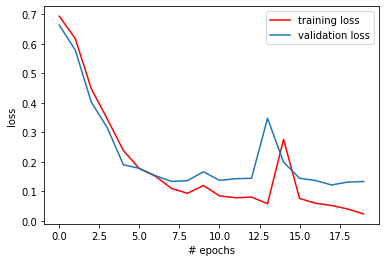

In [24]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#graph for loss 
#some overfiiting
#trained well

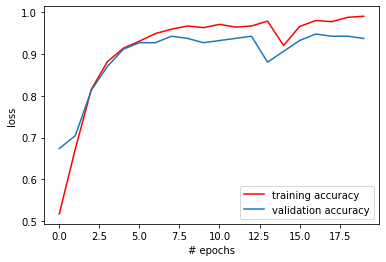

In [25]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
#accuracy graph

In [26]:
print(model.evaluate(test_data,test_target))

#testing accuracy of 96%

413/413 [==============================] - 7s 17ms/step
[0.07535167996259745, 0.9782082438468933]


In [27]:
#DETECT FACES WITH AND WITHOUT MASKS

In [28]:
#WE INOUT IMAGE AND CASCADE CLASSIFIER WE GET ROI (X,Y,W,H) THEN COPY THEN RESIZE INTO 100 BY 100 AND PASS IT TP TRAIN CNN AND PREDICTS FACE WAND WITHOUR MASK

In [19]:
#from keras.models import model_from_json
from keras.models import load_model
import cv2
import numpy as np

model = load_model('model-003.model') #loading my 17th epoch model

face_clsfr=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

source=cv2.VideoCapture(0) #default webcam

labels_dict={0:'MASK',1:'NO MASK'} #face with mask then 0 and face without mask then 1 
color_dict={0:(0,255,0),1:(0,0,255)} #colors bounding rectangle with green color for face with mask and red color for face without mask

In [20]:
while(True):

    ret,img=source.read() #read frame by frame from camera
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #convert to gray
    faces=face_clsfr.detectMultiScale(gray,1.3,5)   #detect face

    for x,y,w,h in faces:
    
        face_img=gray[y:y+w,x:x+w] #for each and every face with calculate roi
        resized=cv2.resize(face_img,(100,100)) #then resize
        normalized=resized/255.0 #normalize
        reshaped=np.reshape(normalized,(1,100,100,1))#reshape to 4-d
        result=model.predict(reshaped) #predict of model 17

        label=np.argmax(result,axis=1)[0] #gives us ethe column no for max prob
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2) #label mask and no mask
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

KeyboardInterrupt: 

In [ ]:
#result will be 1 row and 2 columns , we get two probabilities
#result=[[p1,p2]] p1=0 and p2=1